## Car Price Prediction Assignment

The notebook consists of 4 parts:
1. Data Understanding, Data Exploration and Data Visualisation
2. Data Cleaning
3. Data Preparation
4. Model building, Model evaluation and Residual Analysis

## 1. Data Understanding, Data Exploration and Data Visualisation

Importing the required libraries and having a look at the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset

cars = pd.read_csv("CarPrice_Assignment.csv")

# displaying the first few rows of the dataset

cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

Inspecting the various aspects of the dataframe

In [4]:
# having a look at the shape of the dataset

cars.shape

(205, 26)

In [5]:
# Summary of the dataset
# The dataset consists of 205 rows and 26 columns with no null values in the entire dataset

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# describing the dataframe(displaying the data for all numeric columns)

cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

## Understanding the data

Trying to interpret the significance of the not-so common columns: symboling,aspiration,drivewheel

In [7]:
# understanding the meaning of symboling column

cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### Symboling: A value of +3 indicates risky and -2 safe for our model, most of the cars are between 0-2


In [8]:
# understanding the meaning of aspiration column

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

#### Aspiration: It is an (internal combustion) engine property showing whether the oxygen intake is standard (through atmospheric pressure) or through turbocharging (pressurised oxygen intake)


In [9]:
# understanding the drivewheel column

cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

#### Drivewheel: Describes the drive wheel for two wheel and four wheel; fwd-frontwheel, rwd-rarewheel or 4wd-four-wheel drive


### Visualising other known variables


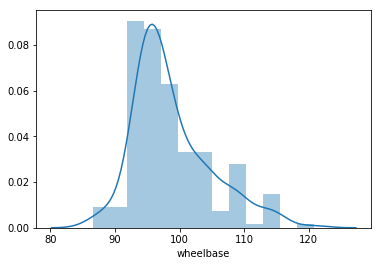

In [10]:
# visualing wheelbase
# It is the distance between centre of front and rarewheels

sns.distplot(cars['wheelbase'])
plt.show()

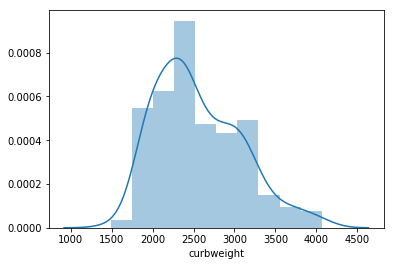

In [11]:
# visualising curbweight
# It is defined as the weight of car without occupants or baggage

sns.distplot(cars['curbweight'])
plt.show()

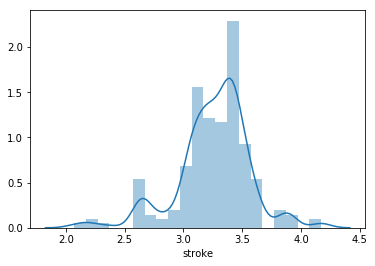

In [12]:
# visualising stroke
# The stroke is defined as the volume of the engine (the distance traveled by the piston in each cycle)

sns.distplot(cars['stroke'])
plt.show()

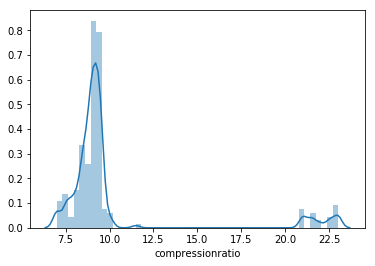

In [13]:
# visualising compression ratio
# The ration consists of ratio of volume of compression chamber at largest capacity to least capacity

sns.distplot(cars['compressionratio'])
plt.show()

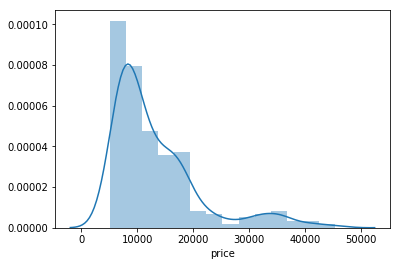

In [14]:
# visualising price
# It denotes the price of car

sns.distplot(cars['price'])
plt.show()

## Data Exploration

In order to perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable.
Therefore, we will first subset the list of all (independent) numeric variables, and then plot the data

In [15]:
# Selecting all numeric (float and int) variables in the dataset

cars_numeric = cars.select_dtypes(include=['float64', 'int64'])

# diplaying the first few rows of the numeric dataset

cars_numeric.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

In [16]:
# dropping the car_ID columnn as it is serving no useful purpose in our dataset and the linear regression model

cars_numeric = cars_numeric.drop(['car_ID'], axis=1)
cars_numeric.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

### Visualising the data

We'll visualise our data using matplotlib and seaborn.

<Figure size 1440x720 with 0 Axes>

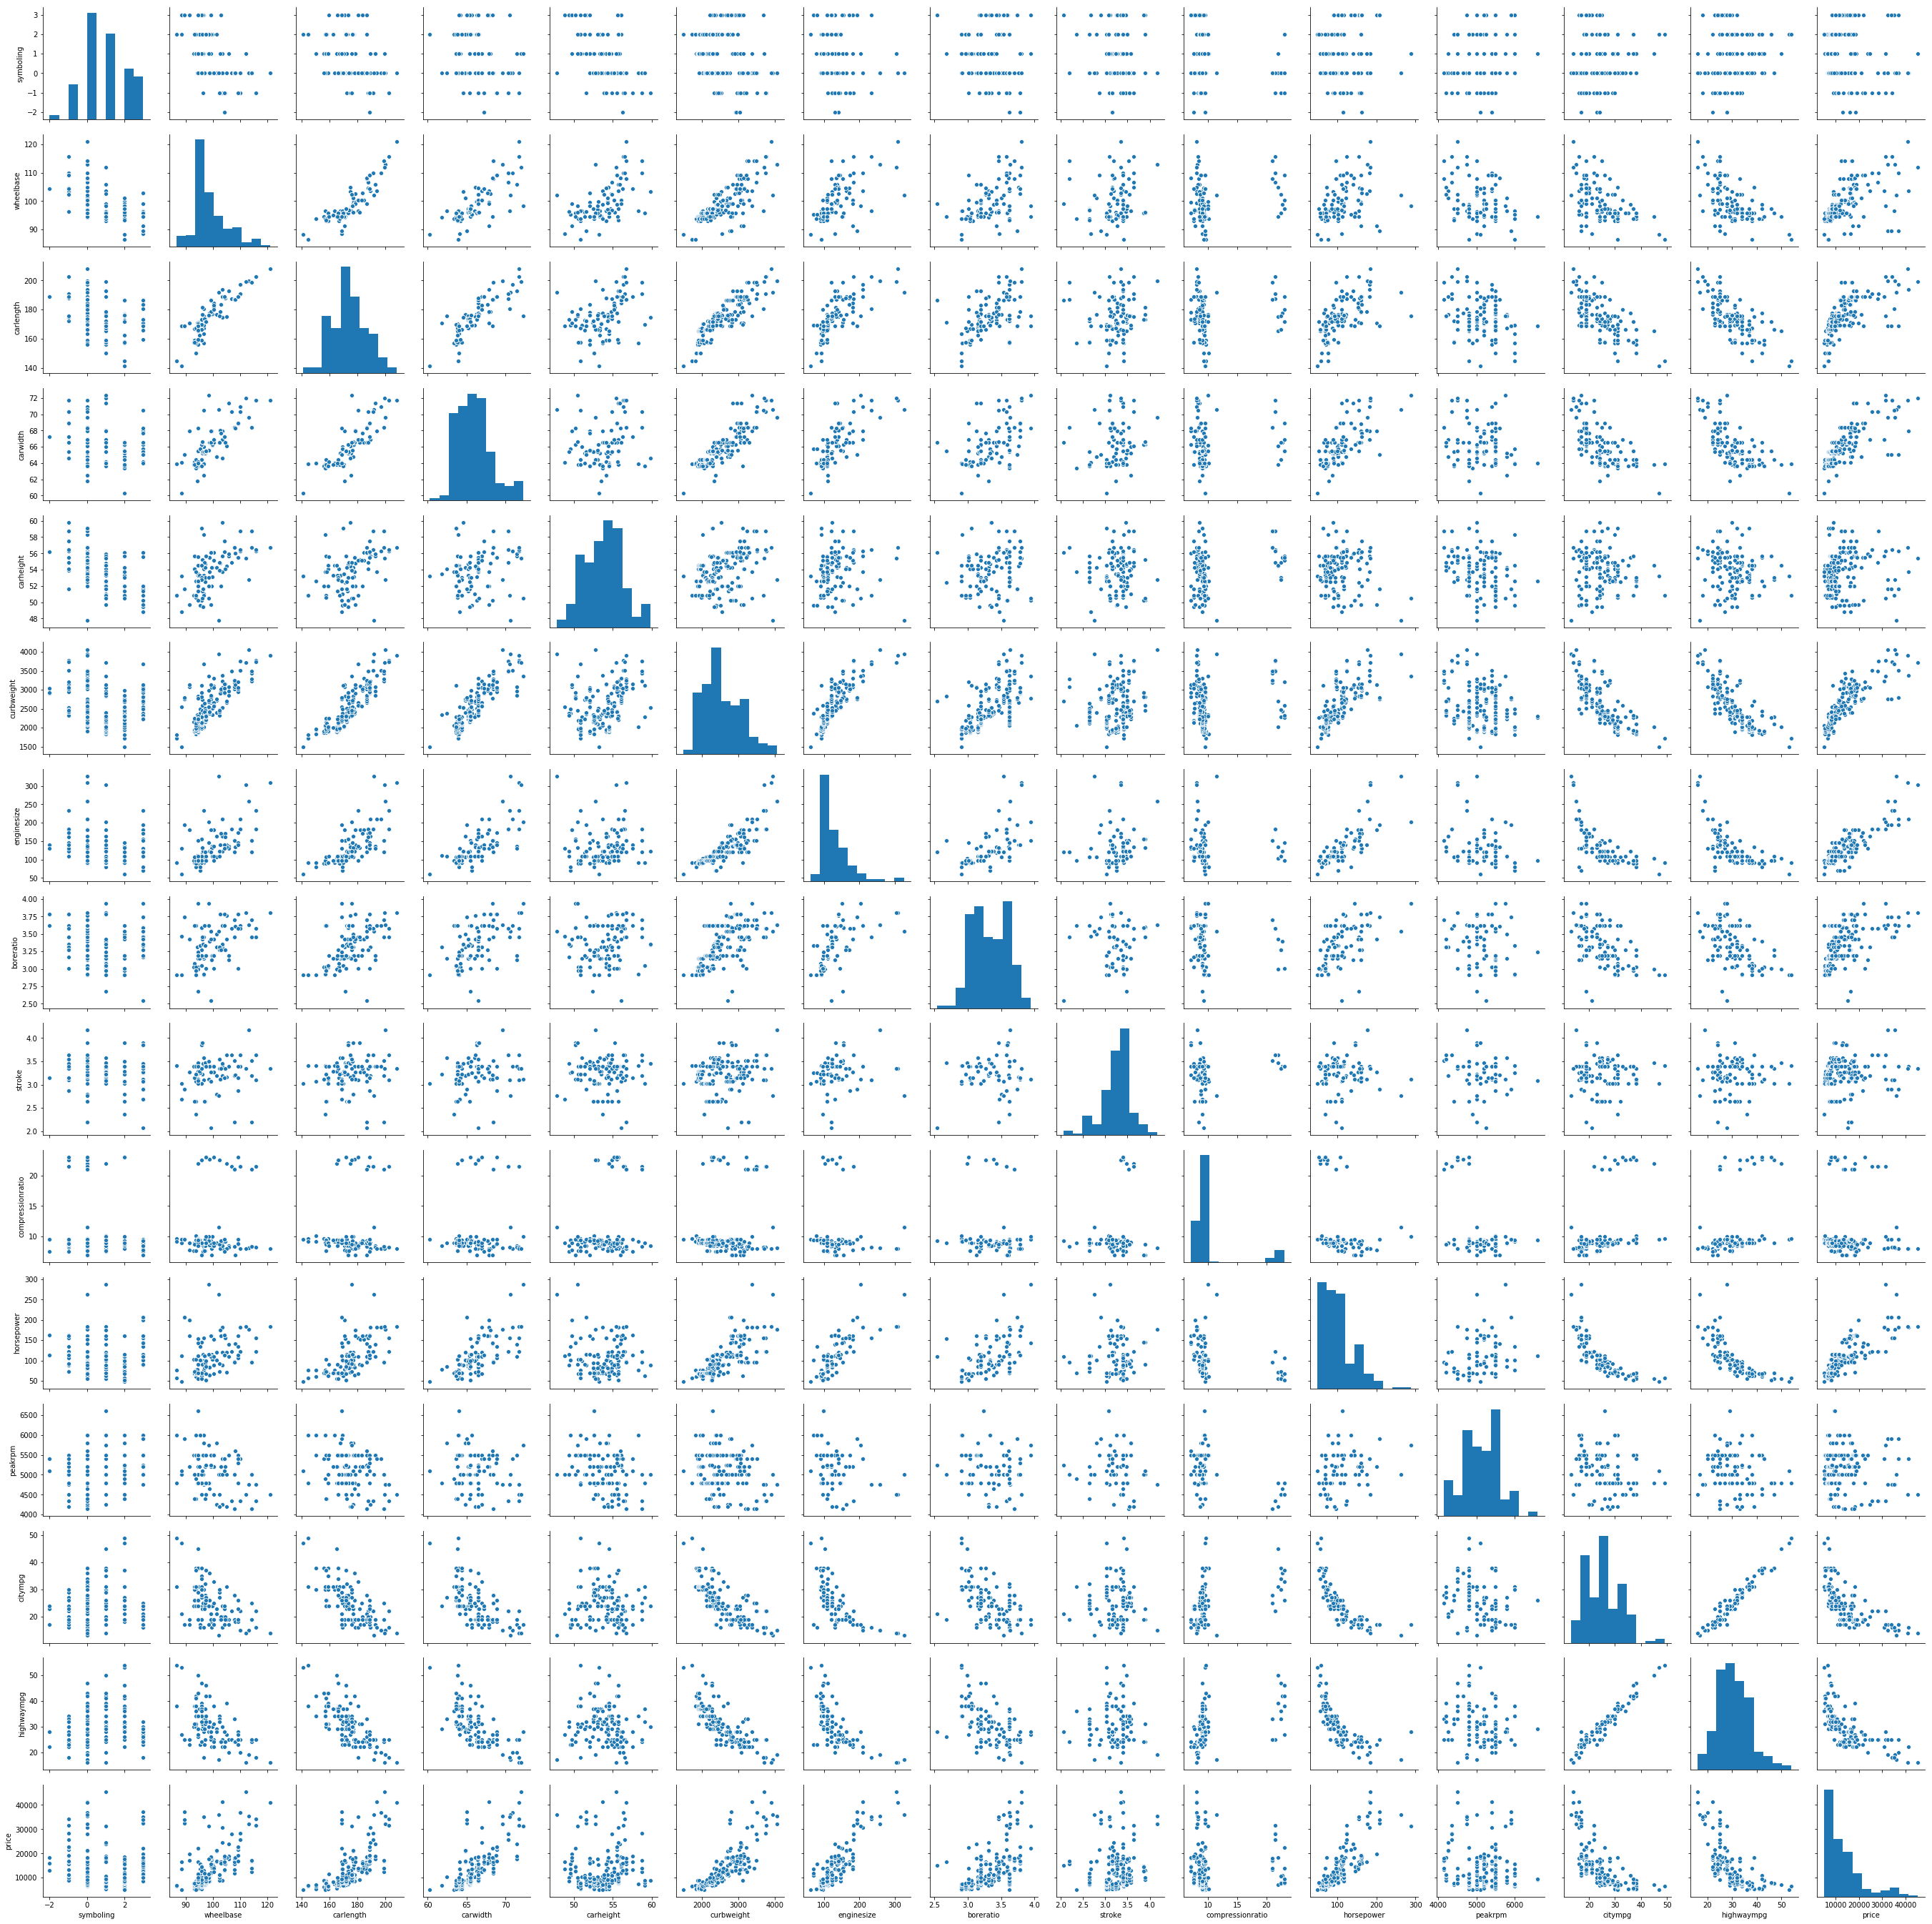

In [17]:
# making a pairplot of all numeric values just derived in the previous step

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

#### As the data plotted using heatmaps is not visible to the eyes and is too cluttered to see at a glance, we can make use of correlation function and visualise the data using heatmap

In [18]:
# Finding the correlation matrix of numerical variables

corr = cars_numeric.corr()
corr

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

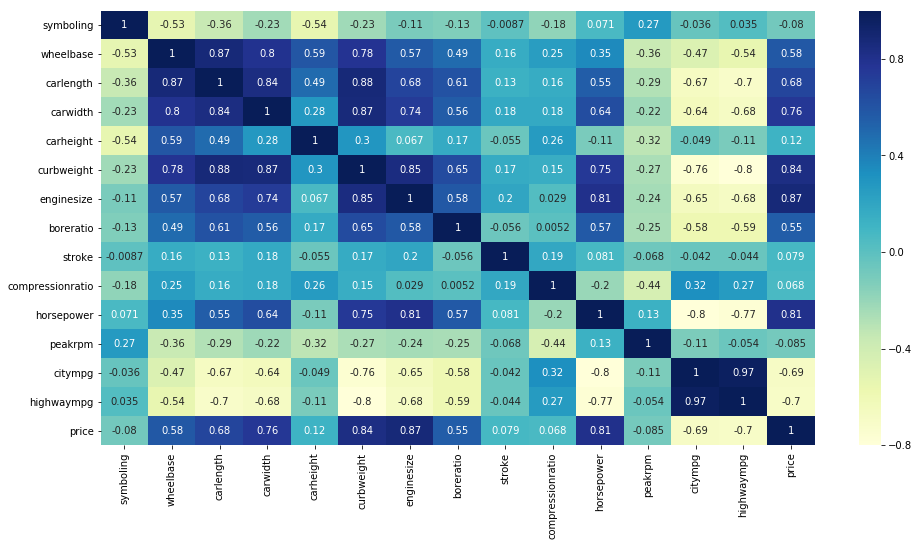

In [19]:
# visualising the correlation using heatmap

plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### Some useful insights which can be deduced from the heatmap

Correlation of price with independent variables:
- Price is highly correlated with ```wheelbase```, ```carlength``` , ```carwidth``` , ```curbweight``` , ```enginesize``` , ```horsepower```

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggests that cars having high mileage may fall in the 'economy' cars category, and are priced lower  

Correlation among independent variables:
- Many independent variables are highly correlated (as can be seen at the top-left part of matrix): ```wheelbase```, ```carlength``` , ```carwidth``` , ```curbweight``` , ```enginesize``` etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to put emphasis to multicollinearity.

## 2. Data Cleaning

In [20]:
# seeing the datatypes of the various columns

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

##### As per the guidelines for the variable named CarName, we need to consider only company name as the independent variable for model building and remove the car model.


In [21]:
# selecting few car names, just to see the format
cars['CarName'][:20]

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
Name: CarName, dtype: object

we notice that the car company name is what occurs before a space, e.g. alfa-romero, audi, chevrolet etc. Thus, we will be extracting the string before the space.

In [22]:
# Extracting carname

# Method: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:20]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
Name: CarName, dtype: object

In [23]:
# Extracting carname using regular expressions

import re
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

In [24]:
# converting the carnames to dataframe and attaching it to the main dataframe 'cars'

cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [25]:
# having a look at the car_company variable to check out the quantities of each category

cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: car_company, dtype: int64

As a result of the above analysis we observe that there are few columns which are mis-spelt:
- vokswagen and vw should be volkswagen
- porcshce should be porsche
- toyouta should be toyota
- Nissan should be nissan
- maxda should be mazda etc.

In [26]:
# renaming the misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'


In [27]:
# checking after renaming

cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

In [28]:
# as our car_names have been extracted from the CarName column, we will drop the CarName column from the main dataframe

cars = cars.drop("CarName",axis =1)

In [29]:
# checking the dataframe's first few rows

cars.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength     ...       fuelsystem  boreratio  \
0          front       88.6      168.8     ...             mpfi       3.47   
1          front       88.6      168.8     ...             mpfi       3.47   
2          front       94.5      171.2     ...             mpfi       2.68   
3          front       99.8      176.6     ...             mpfi       3.19   
4          front       99.4      176.6     ...             mpfi       3.19   

   stroke compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0    2.68              9.0        111     5000      21          27  13495.0   
1    2.68              9.0        111     5000      21          27  16500.0   
2    3.47              9.0        154     5000      19          26  16500.0   
3    3.40             10.0        102     5500      24          30  13950.0   
4    3.40              8.0        115     5500      18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

In [30]:
# displaying the datatypes of all the columsn of the dataframe

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [31]:
# checking for outliers in the dataset

cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

## 3. Data Preparation

To avoid going back to the start again and again to check out the contents of the dataframe. I have imported the dataframe again and again at each step of the assignment


In [32]:
cars.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength     ...       fuelsystem  boreratio  \
0          front       88.6      168.8     ...             mpfi       3.47   
1          front       88.6      168.8     ...             mpfi       3.47   
2          front       94.5      171.2     ...             mpfi       2.68   
3          front       99.8      176.6     ...             mpfi       3.19   
4          front       99.4      176.6     ...             mpfi       3.19   

   stroke compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0    2.68              9.0        111     5000      21          27  13495.0   
1    2.68              9.0        111     5000      21          27  16500.0   
2    3.47              9.0        154     5000      19          26  16500.0   
3    3.40             10.0        102     5500      24          30  13950.0   
4    3.40              8.0        115     5500      18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

We observe that the column name <b>"doornumber"</b> and <b>"cylindernumber"</b> are numeric types with numbers written as words. Converting them to actual numbers to avoid too many dummy variables creation.

In [33]:
# Checking the different levels of 'cylindernumber'

cars['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [34]:
# Checking the different levels of 'doornumber'

cars['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [35]:
# function to map the categorical levels to actual numbers

def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to the two columns

cars[['cylindernumber', 'doornumber']] = cars[['cylindernumber', 'doornumber']].apply(num_map)

In [36]:
# displyaying the first few columns of the dataset after modification

cars.head()

car_ID  symboling fueltype aspiration  doornumber      carbody drivewheel  \
0       1          3      gas        std           2  convertible        rwd   
1       2          3      gas        std           2  convertible        rwd   
2       3          1      gas        std           2    hatchback        rwd   
3       4          2      gas        std           4        sedan        fwd   
4       5          2      gas        std           4        sedan        4wd   

  enginelocation  wheelbase  carlength     ...       fuelsystem  boreratio  \
0          front       88.6      168.8     ...             mpfi       3.47   
1          front       88.6      168.8     ...             mpfi       3.47   
2          front       94.5      171.2     ...             mpfi       2.68   
3          front       99.8      176.6     ...             mpfi       3.19   
4          front       99.4      176.6     ...             mpfi       3.19   

   stroke compressionratio  horsepower  peakrpm citympg  highwaympg    price  \
0    2.68              9.0         111     5000      21          27  13495.0   
1    2.68              9.0         111     5000      21          27  16500.0   
2    3.47              9.0         154     5000      19          26  16500.0   
3    3.40             10.0         102     5500      24          30  13950.0   
4    3.40              8.0         115     5500      18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

Creating dummy variables for the categorical variables

In [37]:
# Subsetting all categorical variables

cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()

fueltype aspiration      carbody drivewheel enginelocation enginetype  \
0      gas        std  convertible        rwd          front       dohc   
1      gas        std  convertible        rwd          front       dohc   
2      gas        std    hatchback        rwd          front       ohcv   
3      gas        std        sedan        fwd          front        ohc   
4      gas        std        sedan        4wd          front        ohc   

  fuelsystem  car_company  
0       mpfi  alfa-romero  
1       mpfi  alfa-romero  
2       mpfi  alfa-romero  
3       mpfi         audi  
4       mpfi         audi

In [38]:
# Converting into dummies variable

cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

fueltype_gas  aspiration_turbo  carbody_hardtop  carbody_hatchback  \
0             1                 0                0                  0   
1             1                 0                0                  0   
2             1                 0                0                  1   
3             1                 0                0                  0   
4             1                 0                0                  0   

   carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  \
0              0              0               0               1   
1              0              0               0               1   
2              0              0               0               1   
3              1              0               1               0   
4              1              0               0               0   

   enginelocation_rear  enginetype_dohcv        ...          \
0                    0                 0        ...           
1                    0                 0        ...           
2                    0                 0        ...           
3                    0                 0        ...           
4                    0                 0        ...           

   car_company_nissan  car_company_peugeot  car_company_plymouth  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   car_company_porsche  car_company_renault  car_company_saab  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   

   car_company_subaru  car_company_toyota  car_company_volkswagen  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   car_company_volvo  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 43 columns]

In [39]:
# after creating the dummy variables out of the categorical columns, let us drop the categorical columns from which the dummy varaibles have been created

cars = cars.drop(list(cars_categorical.columns), axis=1)

In [40]:
# concating the dummy variables along with the original dataframe

cars = pd.concat([cars, cars_dummies], axis=1)

In [41]:
# displaying the first few rows after combining

cars.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0       1          3           2       88.6      168.8      64.1       48.8   
1       2          3           2       88.6      168.8      64.1       48.8   
2       3          1           2       94.5      171.2      65.5       52.4   
3       4          2           4       99.8      176.6      66.2       54.3   
4       5          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize        ...          \
0        2548               4         130        ...           
1        2548               4         130        ...           
2        2823               6         152        ...           
3        2337               4         109        ...           
4        2824               5         136        ...           

   car_company_nissan  car_company_peugeot  car_company_plymouth  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   car_company_porsche  car_company_renault  car_company_saab  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   

   car_company_subaru  car_company_toyota  car_company_volkswagen  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   car_company_volvo  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 61 columns]

In [42]:
# dropping the unnecessary variables 'car_ID'

cars.drop('car_ID', axis = 1, inplace = True)

In [43]:
cars.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio        ...          \
0        2548               4         130       3.47        ...           
1        2548               4         130       3.47        ...           
2        2823               6         152       2.68        ...           
3        2337               4         109       3.19        ...           
4        2824               5         136       3.19        ...           

   car_company_nissan  car_company_peugeot  car_company_plymouth  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   car_company_porsche  car_company_renault  car_company_saab  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   

   car_company_subaru  car_company_toyota  car_company_volkswagen  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   car_company_volvo  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 60 columns]

## 4. Model building, Model evaluation and Residual Analysis

The main steps in model building and evaluation are :
- Create x and y
- Create train and test sets (70:30,80:20)
- Train the model on the training set (learn the coefficients)
- Evaluate the model (training set, test set)

In [44]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features:

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.


Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need to scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [45]:
# printing the columns of the dataframe

cars_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Let's scale all these columns using StandardScaler. As the new columns 'doornumber' and 'cylindernumber' are converted to numeric columns, we need to include them in the list of numeric columns

In [46]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Creating a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber', 'price']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [47]:
# checking the train dataframe 

df_train.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122   0.170159    0.887412  -0.811836  -0.487238 -0.924500  -1.134628   
125   1.848278   -1.126872  -0.677177  -0.359789  1.114978  -1.382026   
166   0.170159   -1.126872  -0.677177  -0.375720 -0.833856  -0.392434   
1     1.848278   -1.126872  -1.670284  -0.367754 -0.788535  -1.959288   
199  -1.507960    0.887412   0.972390   1.225364  0.616439   1.627983   

     curbweight  cylindernumber  enginesize  boreratio        ...          \
122   -0.642128       -0.351431   -0.660242  -1.297329        ...           
125    0.439415       -0.351431    0.637806   2.432256        ...           
166   -0.441296       -0.351431   -0.660242  -0.259197        ...           
1      0.015642       -0.351431    0.123485   0.625138        ...           
199    1.137720       -0.351431    0.123485   1.201877        ...           

     car_company_nissan  car_company_peugeot  car_company_plymouth  \
122                   0                    0                     1   
125                   0                    0                     0   
166                   0                    0                     0   
1                     0                    0                     0   
199                   0                    0                     0   

     car_company_porsche  car_company_renault  car_company_saab  \
122                    0                    0                 0   
125                    1                    0                 0   
166                    0                    0                 0   
1                      0                    0                 0   
199                    0                    0                 0   

     car_company_subaru  car_company_toyota  car_company_volkswagen  \
122                   0                   0                       0   
125                   0                   0                       0   
166                   0                   1                       0   
1                     0                   0                       0   
199                   0                   0                       0   

     car_company_volvo  
122                  0  
125                  0  
166                  0  
1                    0  
199                  1  

[5 rows x 60 columns]

In [48]:
# describing the train data frame

df_train.describe()

symboling    doornumber     wheelbase     carlength      carwidth  \
count  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02   
mean   5.473477e-17  9.006005e-17  1.538785e-15  2.003060e-16 -4.093074e-15   
std    1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00   
min   -2.347020e+00 -1.126872e+00 -2.006930e+00 -2.574223e+00 -2.510760e+00   
25%   -6.689008e-01 -1.126872e+00 -6.771770e-01 -6.186702e-01 -8.565171e-01   
50%    1.701590e-01  8.874120e-01 -3.405307e-01 -1.128552e-01 -1.993522e-01   
75%    1.701590e-01  8.874120e-01  4.505882e-01  7.076008e-01  4.804736e-01   
max    1.848278e+00  8.874120e-01  2.874442e+00  2.324616e+00  2.927846e+00   

          carheight    curbweight  cylindernumber    enginesize     boreratio  \
count  1.430000e+02  1.430000e+02    1.430000e+02  1.430000e+02  1.430000e+02   
mean   5.450186e-16 -1.894367e-16   -3.726623e-16 -4.308908e-17 -1.059758e-15   
std    1.003515e+00  1.003515e+00    1.003515e+00  1.003515e+00  1.003515e+00   
min   -2.371619e+00 -1.937401e+00   -2.084351e+00 -1.566427e+00 -2.412359e+00   
25%   -7.222984e-01 -7.711028e-01   -3.514313e-01 -6.847340e-01 -9.320600e-01   
50%    6.112865e-02 -2.478347e-01   -3.514313e-01 -3.663447e-01  9.948427e-03   
75%    7.414732e-01  7.203955e-01   -3.514313e-01  3.928914e-01  8.942829e-01   
max    2.287711e+00  2.812547e+00    6.580247e+00  4.923816e+00  2.432256e+00   

             ...          car_company_nissan  car_company_peugeot  \
count        ...                  143.000000           143.000000   
mean         ...                    0.097902             0.055944   
std          ...                    0.298227             0.230621   
min          ...                    0.000000             0.000000   
25%          ...                    0.000000             0.000000   
50%          ...                    0.000000             0.000000   
75%          ...                    0.000000             0.000000   
max          ...                    1.000000             1.000000   

       car_company_plymouth  car_company_porsche  car_company_renault  \
count            143.000000           143.000000           143.000000   
mean               0.027972             0.020979             0.013986   
std                0.165472             0.143818             0.117845   
min                0.000000             0.000000             0.000000   
25%                0.000000             0.000000             0.000000   
50%                0.000000             0.000000             0.000000   
75%                0.000000             0.000000             0.000000   
max                1.000000             1.000000             1.000000   

       car_company_saab  car_company_subaru  car_company_toyota  \
count        143.000000          143.000000          143.000000   
mean           0.020979            0.076923            0.139860   
std            0.143818            0.267406            0.348061   
min            0.000000            0.000000            0.000000   
25%            0.000000            0.000000            0.000000   
50%            0.000000            0.000000            0.000000   
75%            0.000000            0.000000            0.000000   
max            1.000000            1.000000            1.000000   

       car_company_volkswagen  car_company_volvo  
count              143.000000         143.000000  
mean                 0.048951           0.041958  
std                  0.216524           0.201198  
min                  0.000000           0.000000  
25%                  0.000000           0.000000  
50%                  0.000000           0.000000  
75%                  0.000000           0.000000  
max                  1.000000           1.000000  

[8 rows x 60 columns]

In [49]:
# splitting the dataset into X and y

y_train = df_train.pop('price')
X_train = df_train

### Building the initial model with all the features

In [50]:
# Instantiate
lm = LinearRegression()

# Fitting a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
print(lm.coef_)
print(lm.intercept_)

[-8.85082799e-03  2.05396206e-02  2.15459688e-01 -1.20891864e-01
  2.14312437e-01 -1.69734529e-01  2.71975134e-01 -2.88819050e-01
  9.98176607e-01 -3.16364315e-01 -1.09027004e-01 -4.45741225e-01
 -1.28216803e-01  1.89046429e-01  6.10383234e-02  7.95225308e-02
 -7.13939879e-01  3.92563218e-01 -5.68397039e-01 -6.33741325e-01
 -5.33209547e-01 -4.44213621e-01 -6.30834556e-02  4.57246372e-02
  9.85062979e-01  9.02650092e-01  9.94703704e-01  2.82949424e-01
  6.10461201e-01  8.12155616e-03  1.12048455e+00  1.19956250e-01
 -3.05423110e-01  7.13939879e-01 -1.11022302e-15 -4.00301122e-02
 -5.85575952e-02 -3.33066907e-16 -1.28333697e-01  1.01695043e+00
  1.12409662e-01 -5.91117054e-01 -7.18611643e-01 -5.01548738e-01
 -3.06608953e-01 -2.48183458e-01 -1.57753086e-01  2.22044605e-16
 -8.09182737e-01 -2.48597762e-01 -1.33327298e+00 -7.13453493e-01
  7.94779273e-01 -3.31355674e-01  7.05291444e-01 -3.74601778e-01
 -1.77619987e-01 -1.76633338e-01  1.86531496e-02]
0.9701688083156523


### Bulding model using RFE

As the number of features in high, we cannot manually eliminate each and every feature.Therefore, we build a model by using Recursive Feature Elimination. At an inital stage, I will select 15 features and then use the statsmodels library to build the model.

In [52]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
#print(rfe1.support_)           
#print(rfe1.ranking_)  

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

Checking the summary of the model using statsmodel

In [53]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  carwidth  enginesize  compressionratio  fueltype_gas  \
122    1.0 -0.924500   -0.660242         -0.172569             1   
125    1.0  1.114978    0.637806         -0.146125             1   
166    1.0 -0.833856   -0.660242         -0.172569             1   
1      1.0 -0.788535    0.123485         -0.278345             1   
199    1.0  0.616439    0.123485         -0.675002             1   

     enginelocation_rear  enginetype_l  enginetype_ohcf  enginetype_rotor  \
122                    0             0                0                 0   
125                    0             0                0                 0   
166                    0             0                0                 0   
1                      0             0                0                 0   
199                    0             0                0                 0   

     fuelsystem_idi  car_company_bmw  car_company_mazda  \
122               0                0                  0   
125               0                0                  0   
166               0                0                  0   
1                 0                0                  0   
199               0                0                  0   

     car_company_mitsubishi  car_company_peugeot  car_company_renault  \
122                       0                    0                    0   
125                       0                    0                    0   
166                       0                    0                    0   
1                         0                    0                    0   
199                       0                    0                    0   

     car_company_subaru  
122                   0  
125                   0  
166                   0  
1                     0  
199                   0

In [54]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.59e-64
Time:                        22:37:46   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### This model seems to be generating a prety good result. We can further verify this by finding out the VIF value

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
4             fueltype_gas        inf
5      enginelocation_rear        inf
7          enginetype_ohcf        inf
9           fuelsystem_idi        inf
15      car_company_subaru        inf
3         compressionratio  42.320000
13     car_company_peugeot   9.730000
6             enginetype_l   8.990000
1                 carwidth   3.380000
2               enginesize   3.300000
8         enginetype_rotor   1.550000
11       car_company_mazda   1.500000
12  car_company_mitsubishi   1.200000
10         car_company_bmw   1.120000
14     car_company_renault   1.010000
0                    const   0.000000

We now notice that there are certain variables which have an infinite VIF. Dropping these variables manually will be time consuming and will unnessacrily be long. In order to avoid this, we will rebuild the model with RFE but this time making use of only 10 features rather than 15 features which we used in the last model

In [57]:
# RFE with 10 features
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe2 = RFE(lm, 10)

# Fit with 10 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [58]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.98e-64
Time:                        22:37:47   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

#### We noticed that the R-sqaured value did not drop that much as compared to the pevious model. It has gone from 0.912 to 0.901. So 10 variables seems to be a good number to start with.

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
3   enginelocation_rear       inf
5       enginetype_ohcf       inf
10   car_company_subaru       inf
8   car_company_peugeot  9.490000
4          enginetype_l  8.950000
2            enginesize  3.230000
1              carwidth  3.170000
0                 const  1.310000
6      enginetype_rotor  1.150000
7       car_company_bmw  1.090000
9   car_company_renault  1.010000

There are still some variables that need to be dropped as they have infinite VIF Value. So, let's start by dropping the variable <b>"car_company_subaru"</b>. 

We will drop the variables with infinite VIF values one by one and not altogether because we need to check the p value after dropping each variable with infinite VIF as the other undropped variables might by dependent on other variables

In [61]:
X_train_rfe2.drop('car_company_subaru', axis = 1, inplace = True)

In [62]:
# Refitting with 9 variables

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.98e-64
Time:                        22:37:48   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8  car_company_peugeot  9.49
4         enginetype_l  8.95
2           enginesize  3.23
1             carwidth  3.17
0                const  1.31
3  enginelocation_rear  1.19
6     enginetype_rotor  1.15
5      enginetype_ohcf  1.12
7      car_company_bmw  1.09
9  car_company_renault  1.01

After dropping the variable <b>"car_company_subaru"</b> which was having an infinite VIF value, we observe that the VIF's has dropped down significantly for the other variables. 

As a result now, we will prefer dropping a variable with a high p value which in the present case is the variable <b>"enginetype_ohcf"</b> which has a p value of 0.157 

In [64]:
X_train_rfe2.drop('enginetype_ohcf', axis = 1, inplace = True)

In [65]:
# Refitting with 8 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.22e-65
Time:                        22:37:48   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7  car_company_peugeot  9.49
4         enginetype_l  8.94
2           enginesize  3.20
1             carwidth  3.17
0                const  1.19
5     enginetype_rotor  1.14
3  enginelocation_rear  1.09
6      car_company_bmw  1.09
8  car_company_renault  1.01

The variables seem significant, but we still have few high VIFs. Let's drop them and see if the Adjusted R-squared score is getting affected.

In [67]:
X_train_rfe2.drop('car_company_peugeot', axis = 1, inplace = True)

In [68]:
# Refitting with 7 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.49e-63
Time:                        22:37:48   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           enginesize  3.14
1             carwidth  2.91
0                const  1.19
5     enginetype_rotor  1.14
3  enginelocation_rear  1.09
4         enginetype_l  1.09
6      car_company_bmw  1.09
7  car_company_renault  1.00

The <b>"enginetype_l"</b> variables has a p-value of 0.3. Let's drop it and see its effect on the model

In [70]:
# Refitting with 6 variables

X_train_rfe2.drop('enginetype_l', axis = 1, inplace = True)

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 6 variables

lm2 = sm.OLS(y_train, X_train_rfe2).fit()   

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.92e-64
Time:                        22:37:49   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           enginesize  3.01
1             carwidth  2.68
4     enginetype_rotor  1.12
0                const  1.10
5      car_company_bmw  1.09
3  enginelocation_rear  1.08
6  car_company_renault  1.00

<b>Now we observe that the all VIF values and p-values seem to be in a good range. Also the Adjusted R-squared value has dropped from 0.91 with 15 variables to just 0.89 using 6 variables. This model is explaining most of the variance without being too complex. So let's proceed further with this model and perform residual analysis</b>

### Residual Analysis
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_price = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

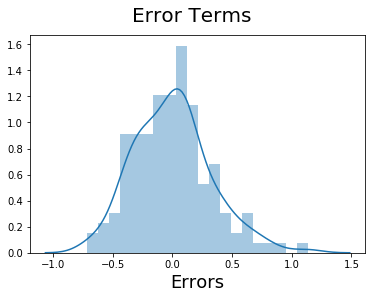

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b>The error terms are fairly normally distributed, so we can finalise this model and make predictions based on this model using the test dataset</b>

### Making predictions using the final model 
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

In [74]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [75]:
# Split the 'df_test' set into X and y

y_test = df_test.pop('price')
X_test = df_test

In [76]:
# selecting the listof column names which have 10 features

col2

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

In [77]:
# subset these columns and create a new dataframe 'X_test_rfe2'

X_test_rfe2 = X_test[col2]

In [78]:
# dropping the manually eliminated variables

X_test_rfe2 = X_test_rfe2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'], axis = 1)

In [79]:
# Add a constant to the test set created

X_test_rfe2 = sm.add_constant(X_test_rfe2)

X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 7 columns):
const                  62 non-null float64
carwidth               62 non-null float64
enginesize             62 non-null float64
enginelocation_rear    62 non-null uint8
enginetype_rotor       62 non-null uint8
car_company_bmw        62 non-null uint8
car_company_renault    62 non-null uint8
dtypes: float64(3), uint8(4)
memory usage: 2.2 KB


In [80]:
# Making predictions

y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

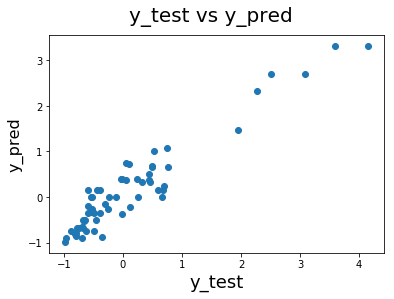

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [82]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8997211435182687

Thus, for the model with 6 variables, the r-squared on training and test data is about 89.6% and 89.9% respectively. The adjusted r-squared on the train set is about is about 89.1%.

#### Checking the correlations between the final predictor variables

In [83]:
col2 = col2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'])

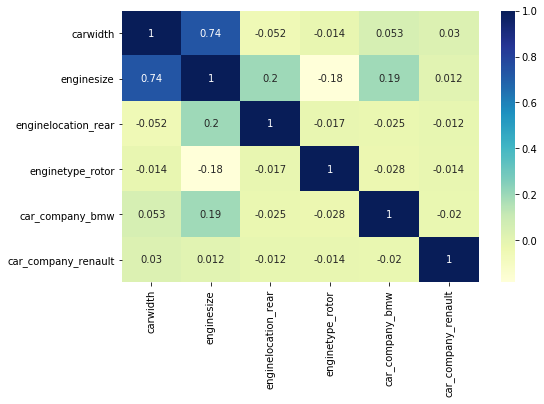

In [84]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(cars[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

Thus, for now, the final model consists of the 6 variables mentioned above.

### Inferences:
The few inferences which can be drawn from the model made using linear regression are as follows:
As we can see that we have considered only 6 variables enginesize , carwidth , enginetype_rotor , car_company_bmw , enginelocation_rear , car_company_renault) for the final model where all variables have the VIF value below 5. The correlation of enginesize with carwidth is the highest (strongest) as compared to other variables which proves to be one of the deciding factors for a carcompany. 